<a href="https://colab.research.google.com/github/LauroCRibeiro/BankingApplication/blob/master/Human_Resources_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Retention Study - Figuring out which employees may quit

#### Loading our Main HR Database Records

In [3]:
import pandas as pd 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df = pd.read_csv(file_name)

hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [6]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
# How many rows are in our dataset?
len(hr_df)

14999

In [8]:
# What about how many columns?
len(hr_df.columns)

9

In [9]:
hr_df.shape

(14999, 9)

Loading our Evaluation and Employee Satisfaction Data

In [10]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [11]:
emp_satis_eval.shape

(14999, 3)

Merge or Join Tables

In [12]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


Is our dataset good? Are there missing values?

In [13]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


Let`s fill in the missing blanks with the average values

In [14]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [16]:
#Checking if we fullfilled those missing values 
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [17]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [18]:
# Removing employee ID 
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [19]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [20]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [21]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [22]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Displaying Your Correlation Matrix

No handles with labels found to put in legend.


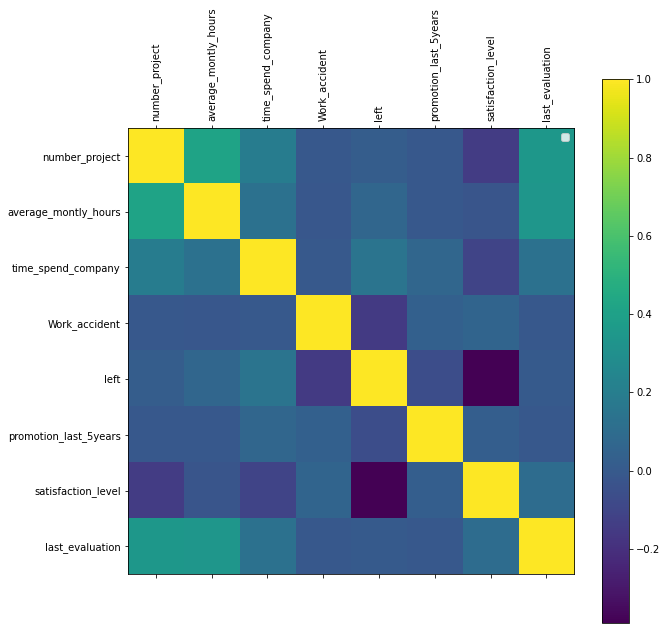

In [23]:
import matplotlib.pyplot as plt 

def plot_corr(df, size=10):
  '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
  '''

  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(main_df_final)

Preparing out Dataset for Machine Learning

In [24]:
# Perform one hot encoding on Categorical Data
categorial = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [25]:
# How many columns do we now have?
len(main_df_final.columns)

19

In [26]:
# How many employees in the datase have left?
len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [27]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [28]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

Preparing our Dataset for Machine Learning


In [29]:
from sklearn.model_selection import train_test_split

#We remove the label values from our training data 
X = main_df_final.drop(['left'], axis=1).values

# We assigned those label values to our Y Dataset
y =main_df_final['left'].values

In [30]:
# Split it to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
# Normalize the data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
df_train= pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.164251,-0.416188,-1.023911,-0.412548,-0.147986,0.915544,-0.796406,-0.238262,-0.230804,-0.22549,-0.203881,-0.249873,-0.252872,1.627663,-0.421519,-0.469002,1.023224,-0.867446
1,1.786515,1.732918,0.353505,-0.412548,-0.147986,-2.069876,1.311273,-0.238262,-0.230804,-0.22549,-0.203881,-0.249873,-0.252872,-0.614378,-0.421519,2.132187,-0.977303,1.152810
2,-1.458014,0.507727,-0.335203,-0.412548,-0.147986,-0.698197,-1.381873,-0.238262,-0.230804,-0.22549,-0.203881,-0.249873,-0.252872,-0.614378,-0.421519,2.132187,1.023224,-0.867446
3,-0.646882,1.451726,-0.335203,-0.412548,-0.147986,1.318979,-1.147686,-0.238262,-0.230804,-0.22549,-0.203881,-0.249873,3.954576,-0.614378,-0.421519,-0.469002,-0.977303,-0.867446
4,-1.458014,-1.380272,-0.335203,-0.412548,-0.147986,-0.899914,-1.030593,-0.238262,-0.230804,-0.22549,-0.203881,-0.249873,-0.252872,-0.614378,2.372374,-0.469002,1.023224,-0.867446


In [33]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,9.813191e-17,-7.508995e-17,-8.615094e-17,-1.607714e-15,3.878960e-16,2.828765e-14,1.302767e-14,3.936909e-16,5.125753e-17,2.647288e-16,7.784092e-16,-4.606543e-16,-1.275969e-15,2.553122e-16,4.589465e-16,-2.502575e-16,-1.611986e-16,1.498415e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.458014e+00,-2.103336e+00,-1.023911e+00,-4.125484e-01,-1.479863e-01,-2.110220e+00,-2.084432e+00,-2.382625e-01,-2.308040e-01,-2.254900e-01,-2.038810e-01,-2.498735e-01,-2.528716e-01,-6.143777e-01,-4.215188e-01,-4.690019e-01,-9.773029e-01,-8.674457e-01
25%,-6.468816e-01,-8.982299e-01,-3.352032e-01,-4.125484e-01,-1.479863e-01,-6.981968e-01,-9.134996e-01,-2.382625e-01,-2.308040e-01,-2.254900e-01,-2.038810e-01,-2.498735e-01,-2.528716e-01,-6.143777e-01,-4.215188e-01,-4.690019e-01,-9.773029e-01,-8.674457e-01
50%,1.642506e-01,-3.457070e-02,-3.352032e-01,-4.125484e-01,-1.479863e-01,1.086735e-01,2.324663e-02,-2.382625e-01,-2.308040e-01,-2.254900e-01,-2.038810e-01,-2.498735e-01,-2.528716e-01,-6.143777e-01,-4.215188e-01,-4.690019e-01,-9.773029e-01,-8.674457e-01
75%,9.753827e-01,8.893438e-01,3.535049e-01,-4.125484e-01,-1.479863e-01,8.348567e-01,9.014462e-01,-2.382625e-01,-2.308040e-01,-2.254900e-01,-2.038810e-01,-2.498735e-01,-2.528716e-01,1.627663e+00,-4.215188e-01,-4.690019e-01,1.023224e+00,1.152810e+00
max,2.597647e+00,2.194875e+00,4.485754e+00,2.423958e+00,6.757383e+00,1.561040e+00,1.662553e+00,4.197052e+00,4.332681e+00,4.434786e+00,4.904822e+00,4.002025e+00,3.954576e+00,1.627663e+00,2.372374e+00,2.132187e+00,1.023224e+00,1.152810e+00


Let`s Train a Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy 79.91%
[[3184  250]
 [ 654  412]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3434
           1       0.62      0.39      0.48      1066

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500



Test Your model on a single new row of data

In [35]:
# Create Test input
#Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas DataFrame
input_data = pd.DataFrame(input_data)

#Transform data using sc.transform
input_data = sc.transform(input_data)

#Reshape data for input into our model predict function
input_data = input_data.reshape(1,-1)

#Run Prediction for our test sameple, 0 means employees will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

#Print probabilities of belonging to either class 
model.predict_proba(input_data)

array([[0.86429377, 0.13570623]])

Let`s Try a Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.11%
[[3430    4]
 [  36 1030]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3434
           1       1.00      0.97      0.98      1066

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [37]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [38]:
main_df_final.drop(['left'], axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [39]:
import pandas as pd 
feature_importances = pd.DataFrame(model.feature_importances_,index=pd.DataFrame(X_train).columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances                                   

,importance
5,0.327237
2,0.182723
0,0.170343
1,0.150679
6,0.124785
3,0.009459
16,0.008836
17,0.004048
15,0.003976
13,0.003347


Can Deep Learning Make a Difference?

In [40]:
# Use the newest version of Tensorflow 2.0
%tensorflow_version 2.x

In [41]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

model = Sequential()

model.add(Dense(9, kernel_initializer="uniform",activation="relu", input_dim=18))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])

In [42]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Start Training Our Classifier
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.7962 - val_loss: 0.3244 - val_accuracy: 0.8291
Epoch 2/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2995 - accuracy: 0.8355 - val_loss: 0.2677 - val_accuracy: 0.8398
Epoch 3/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2565 - accuracy: 0.8980 - val_loss: 0.2328 - val_accuracy: 0.9222
Epoch 4/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2291 - accuracy: 0.9355 - val_loss: 0.2110 - val_accuracy: 0.9407
Epoch 5/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2112 - accuracy: 0.9468 - val_loss: 0.1970 - val_accuracy: 0.9504
Epoch 6/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1989 - accuracy: 0.9502 - val_loss: 0.1850 - val_accuracy: 0.9538
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1901 - accuracy: 0.9514 - val_loss: 0.1763 - val_accuracy:

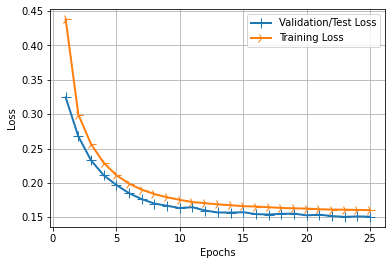

In [44]:
# Plotting our loss charts 
import matplotlib.pyplot as plt 

history_dict = history.history 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker= '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

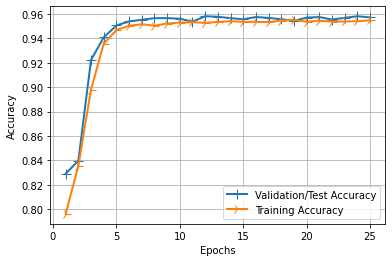

In [45]:
# Plotting our accuracy charts 
import matplotlib.pyplot as plt

history_dict = history.history 

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0,marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Displaying the Classification Report and Confusion Matrix

In [46]:
predictions = model.predict(X_test)
predictions = (predictions >0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3343   91]
 [ 102  964]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3434
           1       0.91      0.90      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



Let`s a Deeper Model

In [47]:
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.layers import Dropout 

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2 
model2.add(Dense(90, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3,noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [48]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training our Deeper Model

In [49]:
batch_size=10
epochs=25

history = model2.fit(X_train, y_train, batch_size = batch_size,epochs = epochs, verbose=1,validation_data=(X_test,y_test))

score= model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.6486 - accuracy: 0.9078 - val_loss: 0.2765 - val_accuracy: 0.9500
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2798 - accuracy: 0.9371 - val_loss: 0.2376 - val_accuracy: 0.9564
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2649 - accuracy: 0.9412 - val_loss: 0.2428 - val_accuracy: 0.9489
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2576 - accuracy: 0.9429 - val_loss: 0.2254 - val_accuracy: 0.9527
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2517 - accuracy: 0.9459 - val_loss: 0.2183 - val_accuracy: 0.9553
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2455 - accuracy: 0.9466 - val_loss: 0.2367 - val_accuracy: 0.9538
Epoch 7/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9435 - val_loss: 0.2109 - val_accuracy:

In [50]:
predictions = model2.predict(X_test)
predictions = (predictions >0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3370   64]
 [ 119  947]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3434
           1       0.94      0.89      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500

